<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Coleta de Dados I
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Arquivos CSV;</li>
  <li>Arquivos Texto;</li>
  <li>Arquivos Excel.</li>
</ol>

---

# **Exercícios**

## 0\. Preparando o ambiente

Vamos explorar dados de crédito presentes no arquivo `credito.xlsx` ([link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.xlsx)). Os dados estão no formato de **Excel** (XLSX) e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de **default**, que indica se um cliente é adimplente (`default = 0`), ou inadimplente (`default = 1`), ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



Faça o download do arquivo `credito.xlsx` com a célula de código abaixo.

In [9]:
!wget --show-progress --continue -O ./credito.xlsx https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/credito.xlsx

--2023-08-29 13:47:31--  https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/credito.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



---

## 1\. Excel para CSV

Utilizando o pacote Python `openpyxl` visto em aula, extraia os seguintes as colunas `id`, `sexo` e `idade` para dos clientes inadimplentes (`default = 1`) e solteiros (`estado_civil = 'solteiro'`). Salves os dados extraídos no arquivo csv `credito.csv` separado por `;`. Exemplo do cabeçalho e das três primeiras linhas:

```
id;sexo;idade
767712558;59;M
713741358;46;M
772390908;59;M
```

**Dica:** O arquivo csv `credito.csv` deve ter 669 linhas, contando com o cabeçalho.

**Nota:** Escreva o código da sua solução abaixo em uma ou mais células, você não precisa enviar o arquivo csv gerado.

---

In [91]:
def indice(coluna):
  cabecalho = next(planilha.values); # salve os valores contidos nas linhas da coluna em "planilha" e passe para a próxima coluna, associe a "cabeçalho" e repita;
  saida = cabecalho.index(coluna); # pegue o os elementos(0, 1, 2, 3 ...)), presentes na matriz "cabeçalho", baseado no parametro passado em "coluna" e associe a "saida";
  return saida; # retorne o resultado de "saida";

In [92]:
# solução do exercício 1;
from openpyxl import load_workbook; # importe a função "load_workbook" da biblioteca "openpyxl"
import csv # importe a bibliotaca "csv";

# carregando a planilha;
planilhas = load_workbook(filename='credito.xlsx'); # abra o arquivo;
planilha = planilhas.active; # selecione a aba ativa;

# encontre os índices das informações desejadas utilizando a função própria "indice";
indice_default = indice('default');
indice_estado_civil = indice('estado_civil');
indice_id = indice('id');
indice_idade = indice('idade');
indice_sexo = indice('sexo');

# filtre os valores desejados;
filtrada = [(linha[indice_id], linha[indice_idade], linha[indice_sexo]) # pegue os valores extraidos das colunas e postos em cada variavel correspondente, associando-os a controle "linha" e por fim a "filtrada":
  for linha in planilha.values # PARA cada valor de "linha" EM valores de "planilha" FAÇA:
    if linha[indice_default] == 1 and linha[indice_estado_civil] == 'solteiro']; # SE "linha[indice_default]" for igual a 1 E "linha[indice_estado_civil]" igual a 'solteiro' FAÇA:
    # retorne para "filtrada";

# criando o arquivo csv;
with open(file='./credito_inadimplentes.csv', mode='w', encoding='utf8') as arquivo: # ABRA/CRIE o arquivo ... em modo de escrita, na cod ... com apelido de "arquivo" e FAÇA:
 escritor_csv = csv.writer(arquivo, delimiter=';'); # escreva em "arquivo" delimitando as colunas por ";" e associe a ...;
 escritor_csv.writerows([['id','idade','sexo' ]] # escreva no titulo das colunas [...] em "arquivo" contido em "escritor_csv";
  + list(map(lambda infos: infos, filtrada))); # como extra mapei transformando em lista as informações contidas em "filtrada";

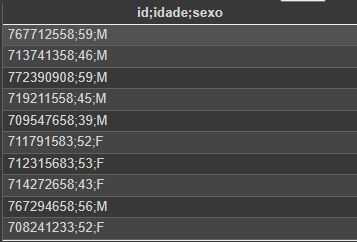

## 2\. Excel para JSON

Como preparação para o próximo módulo, vamos trabalhar com o JSON, um formato semi-estruturado, muito utilizado em transmissão de dados da web e equivalente a um **dicionário** Python.

Utilizando o pacote Python `openpyxl` visto em aula, extraia os dados das colunas `escolaridade` e `tipo_cartao`, removendo duplicados. Com os dados, construa o dicionário Python `credito` com a seguinte estrutura:

```python
credito = {
  'tipo_cartao': ['silver', 'blue', 'gold', 'platinum'],
  'escolaridade': ['doutorado', 'mestrado', 'na', 'sem educacao formal', 'graduacao', 'ensino medio']
}
```

Para finalizar, utilize o código abaixo para converter o dicionário `credito` no formato JSON:

```python
import json

credito_json = json.dumps(credito, indent=4)
print(credito_json)
```

**Dica:** Sua solução deve gerar o dicionário Python `credito` igual ao exemplo mas a ordem dos elementos pode variar tranquilamente.

**Dica:** Uma excelente forma de remover elementos duplicados de uma lista é convertê-la para `set` e depois para `list` novamente.



In [90]:
# solução do exercício 2
import json
from openpyxl import load_workbook; # importe a função "load_workbook" da biblioteca "openpyxl"

# extraindo a planilha;
planilhas = load_workbook(filename='credito.xlsx'); # extraia o conteudo presente no arquivo e associeo a uma planilha simulada da variavel;
planilha = planilhas.active; # ative as linhas e colunas simuladas na variavel e associe;
cabeçalho = next(planilha.values); # colete os valores das colunas e linhas e associe;

# extraindo as colunas desejadas;
indice_tipo_cartao = cabeçalho.index('tipo_cartao'); # extraia somente a coluna com o valor 'tipo_cartao' e associe;
indice_escolaridade = cabeçalho.index('escolaridade'); # extraia somente a coluna com o valor 'escolaridade' e associe;

# extraindo os valores contidos nas colunas desejadas;
tipo_cartao = [linha[indice_tipo_cartao] for linha in planilha.values]; # para cada linha contida nos valores da variavel, extraia o valor da linha;
tipo_cartao = list(set(tipo_cartao)); # introduza a variavel em um tipo lista e re-associe;
del tipo_cartao[0]; # defina a variavel como o indice 0 da lista em que ele foi introduzido;

escolaridade = [linha[indice_escolaridade] for linha in planilha.values]; # para cada linha contida nos valores da variavel, extraia o valor da linha;
escolaridade = list(set(escolaridade)); # introduza a variavel em um tipo lista e re-associe;
del escolaridade[1]; # defina a variavel como o indice 1 da lista em que ele foi introduzido;

# criando o dicionario;
cartao = dict.fromkeys(['tipo_cartao'], tipo_cartao); # crie a chave do dicionario "cartao" e introduza os valores contidos em "tipo_cartao" a chave nomeada;
escola = dict.fromkeys(['escolaridade'], escolaridade); # crie a chave do dicionario "escola" e introduza os valores contidos em "escolaridade" a chave nomeada;
credito = {**cartao, **escola}; # crie o dicionario associando-o as chaves;

# convertendo o dicionario para JSON;
credito_json = json.dumps(credito, indent=4); # conversao
print(credito_json); # mostre

{
    "tipo_cartao": [
        "blue",
        "silver",
        "platinum",
        "tipo_cartao"
    ],
    "escolaridade": [
        "doutorado",
        "sem educacao formal",
        "mestrado",
        "ensino medio",
        "graduacao",
        "na"
    ]
}




---


## 3\. BÔNUS: Texto para CSV

No arquivo de texto `ebac.txt` você encontra o texto presente no rodapé da página de cursos da EBAC ([link](https://ebaconline.com.br/)).



**Arquivo TXT:** ebac.txt

In [3]:
%%writefile ebac.txt
MÍDIAS SOCIAIS
Instagram, Facebook, Youtube, LinkedIn

CURSOS
Software, Design, Marketing, Audiovisual, Programação & Data, Games

WEBINARS
Próximos, Anteriores

SOBRE
Sobre nós, Centro de carreiras, Vagas

CONTATO
WhatsApp +55 (11) 4200-2991
Telefone +55 (11) 3030-3200

BLOG
Design, Audiovisual, Marketing

Writing ebac.txt


Extraia os números de contato do arquivo texto `ebac.txt` e salve-os no arquivo csv `contato_ebac.csv` com o separador `;` no seguinte formato:

```
tipo;numero
whatsapp;+551142002991
telefone;+551130303200
```

**Nota:** Escreva o código da sua solução abaixo em uma ou mais células, você não precisa enviar o arquivo csv gerado.

In [39]:
def sub(char):
  saida = ln.replace(char, ""); # substitua a valor passado no parametro por nada;
  return saida; # retorne o resultado de "saida";

In [89]:
# solução do exercício 3 (bônus);
import re;

# abrindo arquivo;
with open(file='./ebac.txt', mode='r', encoding='utf8') as arquivo:  # abra o arquivo no modo leitura, na codificação ... e apilide de arquivo:
  linhas = arquivo.readlines(); # leia todas as linhas presentes no arquivo e atribua a "linhas";

# limpando dados;
linhas = filter(lambda linha: linha != '\n', linhas); # atraves da função curta filtre cada linha do arquivo pelo caracter enter "\n" presente em linhas e atribua a;
linhas = map(lambda linha: linha.strip(), linhas); # atraves da função curta mapeie cada linha, eleminando os espaços em linhas e atribua a;
linhas = list(linhas); # converta em tipo de lista;
##print(linhas); # mostre;

# filtrando dados desejados;
linhas_nums = filter(lambda linha: '+' in linha, linhas); # atraves da função curta filtre cada linha do aquivo que tiver o caracter "+" presente em linhas e atribua a;
linhas_nums = list(linhas_nums); # converta em tipo de lista;

##print(linhas_nums); # mostre;

# convertendo dados filtrados;
ln = "".join(linhas_nums); # converta do tipo da variavel para str e associe;

##print(ln); # mostre;

# tratando dados desejados;
# utilize a função de substituição;
ln = sub('(');
ln = sub(')');
ln = sub('-');
ln = sub(" ");

ln = ln.lower(); # torne todo o texto minusculo;

##print(ln); # mostre;

# filtrando e separando;
numero = re.findall("\+5\d+", ln); # busque apartir do caracter "+5" + todos os numeros seguidos dele contidos em ln e associe;
tipo = re.findall("[a-zA-Z]+", ln); # busque todos os caracter de a-z contidos em ln e associe;

lstone = tipo[0], numero[0]; # pegue o valor no indice da lista e junte as lista em;
lsttwo = tipo[1], numero[1]; # pegue o valor no indice da lista e junte as lista em;
lst = lstone, lsttwo; # junte as listas;

##print(lst) # mostre;

# criando o arquivo csv;
with open(file='./contato_ebac.csv', mode='w', encoding='utf8') as arquivo: # ABRA/CRIE o arquivo ... em modo de escrita, na cod ... com apelido de "arquivo" e FAÇA:
 escritor_csv = csv.writer(arquivo, delimiter=';'); # escreva em "arquivo" delimitando as colunas por ";" e associe a ...;
 escritor_csv.writerows([['tipo','numero']] # escreva no titulo das colunas [...] em "arquivo" contido em "escritor_csv";
  + list(map(lambda infos: infos, lst))); # como extra mapei transformando em lista as informações contidas em "filtrada";


['MÍDIAS SOCIAIS', 'Instagram, Facebook, Youtube, LinkedIn', 'CURSOS', 'Software, Design, Marketing, Audiovisual, Programação & Data, Games', 'WEBINARS', 'Próximos, Anteriores', 'SOBRE', 'Sobre nós, Centro de carreiras, Vagas', 'CONTATO', 'WhatsApp +55 (11) 4200-2991', 'Telefone +55 (11) 3030-3200', 'BLOG', 'Design, Audiovisual, Marketing']
['WhatsApp +55 (11) 4200-2991', 'Telefone +55 (11) 3030-3200']
WhatsApp +55 (11) 4200-2991Telefone +55 (11) 3030-3200
whatsapp+551142002991telefone+551130303200
['+551142002991', '+551130303200']
['whatsapp', 'telefone']
(('whatsapp', '+551142002991'), ('telefone', '+551130303200'))


---

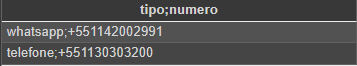